# Additional session #1

**Thursday, October 20**

## Sampling distribution

Suppose there is some proportion ***p*** that we want to measure. We usually don't have access to information for all the population, so we estimate ***p*** by computing the proportion ***p̂*** in a random sample. 

The sample proportion ***p̂*** is random, as it may produce a different estimate if we apply it to a different sample. The **sampling distribution** is the distribution of the sample proportion ***p̂***. In other words, it is a probability distribution formed by the estimates we obtain from calculating the proportion for different samples from the population of interest.

The sample proportion ***p̂*** is a random variable, so it has an expected value and a standard deviation. The **Central Limit Theorem** states that for a large enough sample (n > 30), the distribution of ***p̂*** is approximately normal:
\begin{align*}
N(p,\sqrt{\frac{p(1-p)}{n}})
\end{align*}

If we were interested in measuring a population mean ***$\mu$*** instead of a population proportion ***p***, the distribution of ***$\hat{\mu}$*** will have an approximately normal sampling distribution with mean and standard deviation:
\begin{align*}
N(\mu,\frac{\sigma}{\sqrt{n}})
\end{align*}

## Sampling distribution in R

Suppose we had income data for the entire population of a city. Does this look like a normal distribution?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



[1] 7.023109

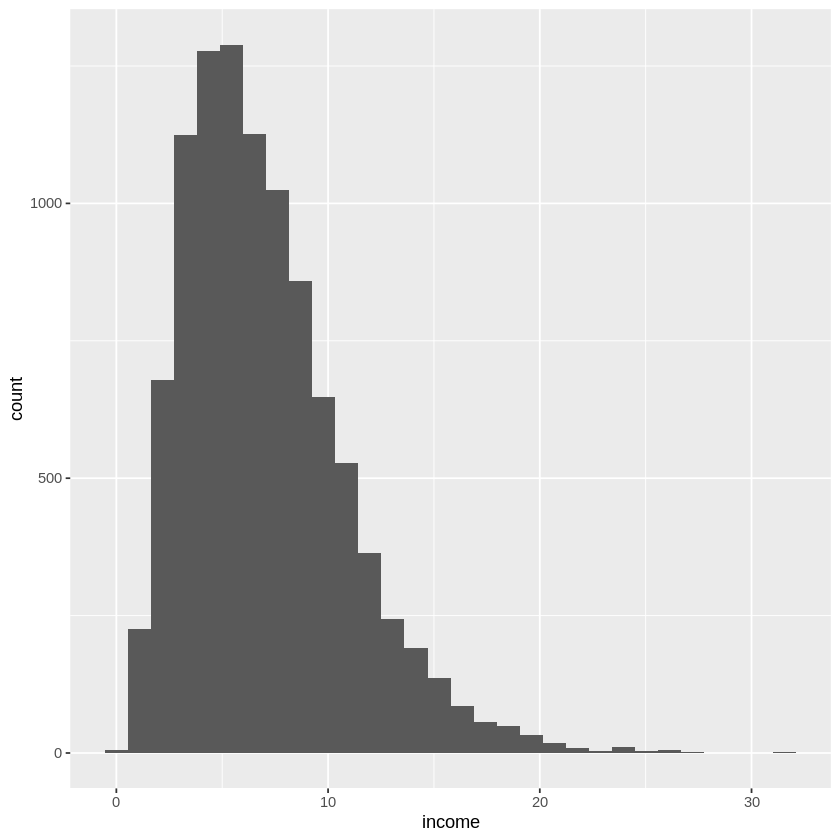

In [ ]:
library(tidyverse)
data <- tibble(income=rchisq(10000, df = 7))

ggplot(data) +
geom_histogram(aes(x=income))

mean(data$income)

We can sample 500 people from the population using the function `sample`. Does it look like a normal distribution?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



[1] 6.914527

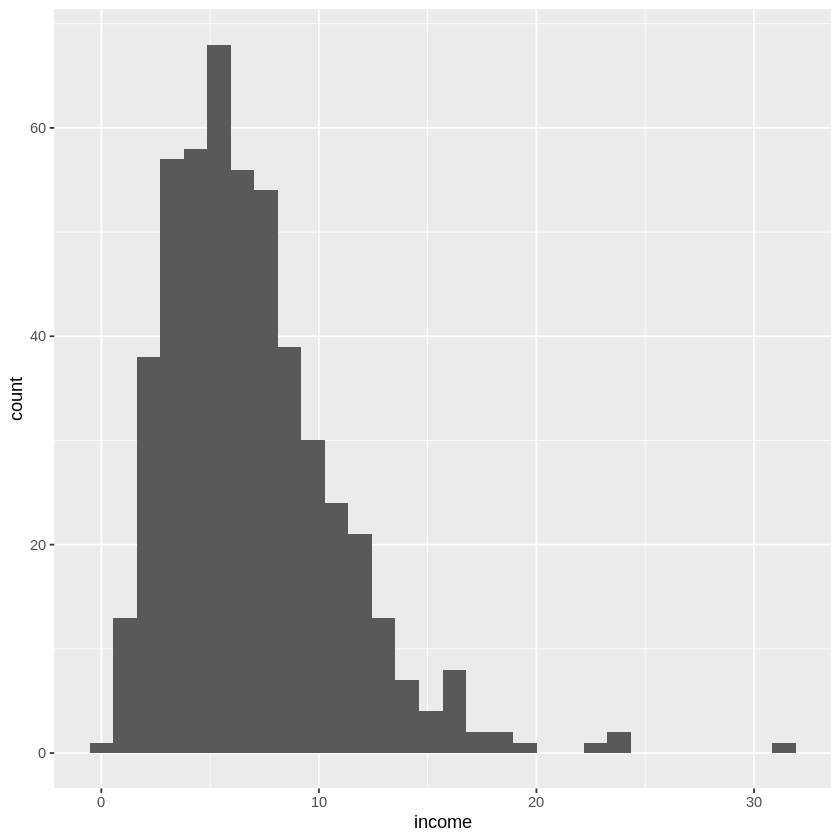

In [ ]:
one_sample <- tibble(income=sample(data$income, 500))
ggplot(one_sample) +
geom_histogram(aes(x=income))

mean(one_sample$income)

We can use the `replicate` function to sample from the population multiple times and calculate for each simulation the sample mean $\hat{\mu}$.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



[1] 7.021934

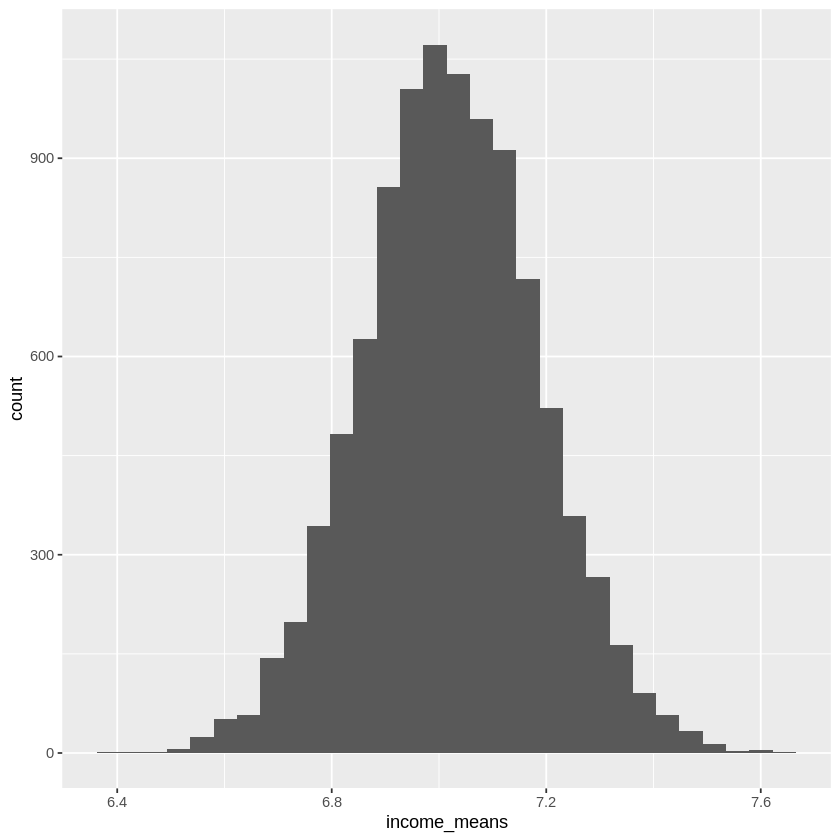

In [ ]:
income_means <- replicate(10000, mean(sample(data$income, 500)))

many_samples <- tibble(income_means=income_means)
ggplot(many_samples) +
geom_histogram(aes(x=income_means))

mean(many_samples$income_means)


As you can see, even though the population distribution is not normally distributed, the distribution of the sample mean is approximately normally distributed.

## Confidence intervals

Going back to the example about sample proportions, we can use the sampling distribution of ***p̂*** to tell us how confident we are in our estimate. if the sampling distribution is normal, then we can construct a 95% confidence interval around ***p̂*** by using the mean and standard deviation of ***p̂***. However, given that we don't know ***p***, we use both the sample proportion and the estimated standard error instead, such that: 
\begin{align*}
CI = p̂ \pm 2 SD(p̂)
\end{align*}

This implies that 95% of all possible confidence intervals will contain the true value of ***p***.

If we wanted to estimate a mean instead, the 95% confidence interval has the same form as before:
\begin{align*}
CI = \hat{\mu} \pm 2 SD(\hat{\mu})
\end{align*}

Plugging in the standard deviation of the sample mean, we get:

\begin{align*}
CI = \hat{\mu} \pm \frac{2\hat{\sigma}}{\sqrt{n}}
\end{align*}